<a href="https://colab.research.google.com/github/akshat8292/Bharat-Intern/blob/main/Cat_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 23.6MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D,Dropout

In [5]:
#generators -create batches
train_ds =keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
#creating CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense (128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 109ms/step - loss: 1.2341 - accuracy: 0.5882 - val_loss: 0.6028 - val_accuracy: 0.6660
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5712 - accuracy: 0.7071 - val_loss: 0.5261 - val_accuracy: 0.7302
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4861 - accuracy: 0.7663 - val_loss: 0.5551 - val_accuracy: 0.7146
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4224 - accuracy: 0.8087 - val_loss: 0.4531 - val_accuracy: 0.8016
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3545 - accuracy: 0.8444 - val_loss: 0.4478 - val_accuracy: 0.7976
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2810 - accuracy: 0.8806 - val_loss: 0.5440 - val_accuracy: 0.7778
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2043 - accuracy: 0.9175 - val_loss: 0.5191 - val_ac

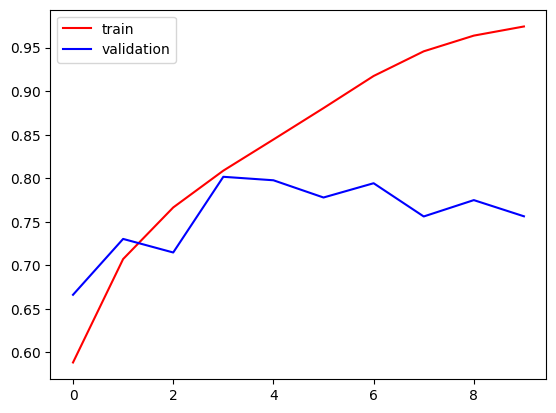

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')

plt.plot(history.history['val_accuracy'], color='blue', label='validation')

plt.legend()

plt.show()

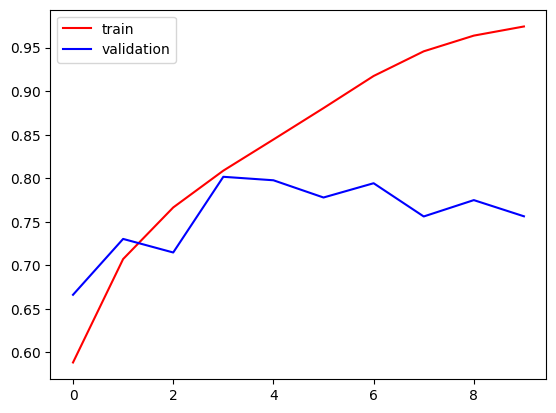

In [14]:
plt.plot(history.history['accuracy'], color='red', label='train')

plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()

plt.show()

In [15]:
#need to reduce complexity
#add more data
#reduce complexity
import cv2

In [18]:
test_image=cv2.imread('/content/simba-8618301_1280.webp')

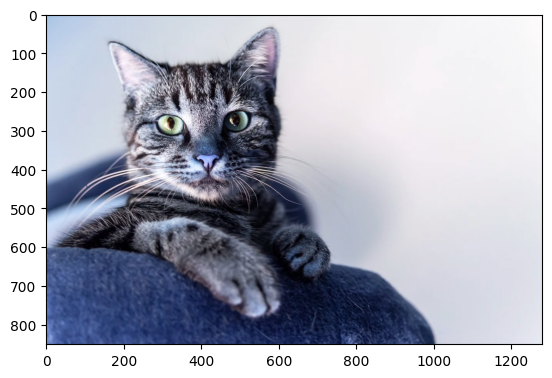

In [19]:
plt.imshow(test_image)

In [20]:
test_image.shape

(851, 1280, 3)

In [21]:
test_image=cv2.resize(test_image,(256,256))

In [22]:
test_input = test_image.reshape(1,256,256,3)

In [23]:
model.predict(test_input)

1/1 [==============================] - 0s 384ms/step


array([[1.]], dtype=float32)